In [67]:
import pandas as pd
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plot
import numpy as np
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)


# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')



INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 107.0.5304
INFO:WDM:Current google-chrome version is 107.0.5304
Get LATEST chromedriver version for 107.0.5304 google-chrome
INFO:WDM:Get LATEST chromedriver version for 107.0.5304 google-chrome
Driver [/Users/brentonervin/.wdm/drivers/chromedriver/mac64/107.0.5304.62/chromedriver] found in cache
INFO:WDM:Driver [/Users/brentonervin/.wdm/drivers/chromedriver/mac64/107.0.5304.62/chromedriver] found in cache


In [68]:
table = html_soup.find('table', class_='table')

In [70]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

print(df)



[        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]]


In [71]:
mars_temp_df = df[0]

In [72]:
mars_temp_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [73]:
mars_temp_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [74]:
#Convert datatypes
mars_temp_df["terrestrial_date"] =mars_temp_df["terrestrial_date"].astype("datetime64")

In [75]:
mars_temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [76]:
#Question 1
# How Many Months exist on Mars?

#12 Months exist on mars Maybe
mars_temp_df.month.unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [136]:
#Question 2
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?

#1867 Days
mars_temp_df.sol.count()

1867

In [115]:
Month_Min_Temp_df = mars_temp_df.groupby('month')['min_temp'].mean() 

In [116]:
Month_Min_Temp_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

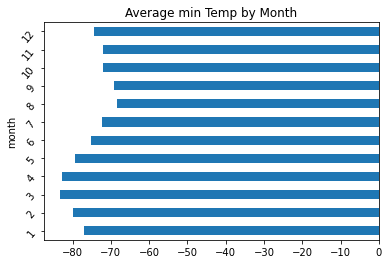

In [135]:
#Question 3
#What are the coldest and the warmest months on Mars.
#Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.


#The Coldest Month on Mars is Month 3 and the Warmest Month is Month 8

#Month_Min_Temp_df.plot.barh(x="month", y="min_temp", rot=50, title="Average min Temp by Month");
Month_Min_Temp_df.plot.barh(x="month", y="min_temp", rot=50, title="Average min Temp by Month");

In [118]:
Mars_pressure_df = mars_temp_df.groupby('month')['pressure'].mean() 

In [119]:
Mars_pressure_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

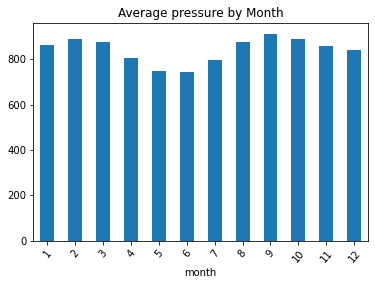

In [120]:
#Question 4
#Which months have the lowest and the highest atmospheric pressure on Mars? 
#Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

#Month 6 has the lowest pressure and month 9 has the highest pressure
Mars_pressure_df.plot.bar(x="month", y="pressure", rot=50, title="Average pressure by Month");

In [144]:
#Question 5
#About how many terrestrial (Earth) days exist in a Martian year? That is, 
#in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature

#I estimate the today number of days is 589 which is within 25% of the true value.
result =  mars_temp_df[mars_temp_df['sol'].between(10, 668)]

result

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
584,607,2014-06-19,664,147,5,-78.0,732.0
585,610,2014-06-20,665,148,5,-78.0,735.0
586,608,2014-06-21,666,148,5,-77.0,736.0
587,606,2014-06-22,667,149,5,-76.0,736.0


In [145]:
result['terrestrial_date'].count()

589

In [ ]:
#Save file as csv

In [166]:
mars_temp_df.to_csv('Mars_info.csv')